In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
data.fillna(method='ffill', inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_14412\127180774.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


#### basic statistics

In [6]:
mean_values = data.mean(numeric_only=True)
print("Mean Values:\n", mean_values)

Mean Values:
 person_age                       27.764178
person_income                 80319.053222
person_emp_exp                    5.410333
loan_amnt                      9583.157556
loan_int_rate                    11.006606
loan_percent_income               0.139725
cb_person_cred_hist_length        5.867489
credit_score                    632.608756
loan_status                       0.222222
dtype: float64


In [7]:
median_values = data.median(numeric_only=True)
print("\nMedian Values:\n", median_values)



Median Values:
 person_age                       26.00
person_income                 67048.00
person_emp_exp                    4.00
loan_amnt                      8000.00
loan_int_rate                    11.01
loan_percent_income               0.12
cb_person_cred_hist_length        4.00
credit_score                    640.00
loan_status                       0.00
dtype: float64


In [8]:
std_values = data.std(numeric_only=True)
print("\nStandard Deviation:\n", std_values)


Standard Deviation:
 person_age                        6.045108
person_income                 80422.498632
person_emp_exp                    6.063532
loan_amnt                      6314.886691
loan_int_rate                     2.978808
loan_percent_income               0.087212
cb_person_cred_hist_length        3.879702
credit_score                     50.435865
loan_status                       0.415744
dtype: float64


In [9]:
min_values = data.min(numeric_only=True)
max_values = data.max(numeric_only=True)
print("\nMinimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)


Minimum Values:
 person_age                      20.00
person_income                 8000.00
person_emp_exp                   0.00
loan_amnt                      500.00
loan_int_rate                    5.42
loan_percent_income              0.00
cb_person_cred_hist_length       2.00
credit_score                   390.00
loan_status                      0.00
dtype: float64

Maximum Values:
 person_age                        144.00
person_income                 7200766.00
person_emp_exp                    125.00
loan_amnt                       35000.00
loan_int_rate                      20.00
loan_percent_income                 0.66
cb_person_cred_hist_length         30.00
credit_score                      850.00
loan_status                         1.00
dtype: float64


In [10]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [11]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [12]:
print(data_encoded.head())

   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0        71948.0               0    35000.0          16.02   
1        21.0        12282.0               0     1000.0          11.14   
2        25.0        12438.0               3     5500.0          12.87   
3        23.0        79753.0               0    35000.0          15.23   
4        24.0        66135.0               1    35000.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.49                         3.0           561            1   
1                 0.08                         2.0           504            0   
2                 0.44                         3.0           635            1   
3                 0.44                         2.0           675            1   
4                 0.53                         4.0           586            1   

   person_gender_male  ...  person_education_Master  \
0            

### Data Visualization

#### Histogram of loan amounts

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


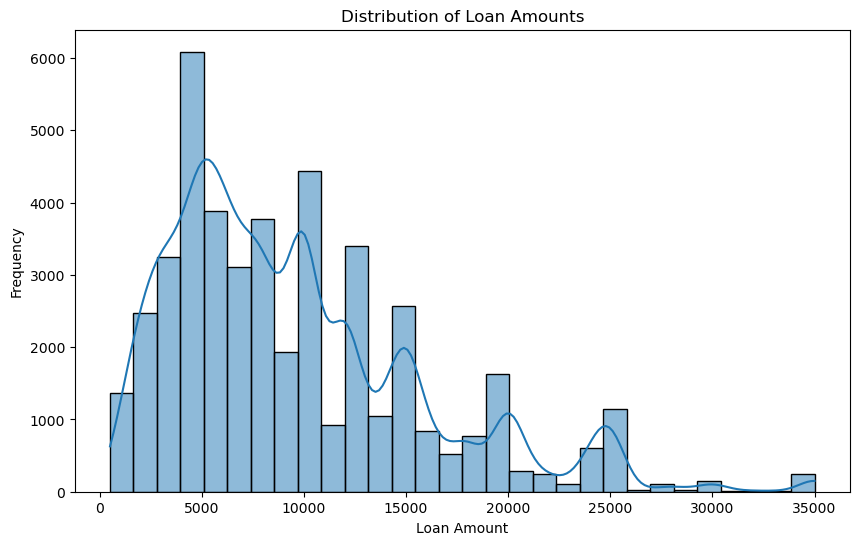

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

#### Bar chart for loan status counts

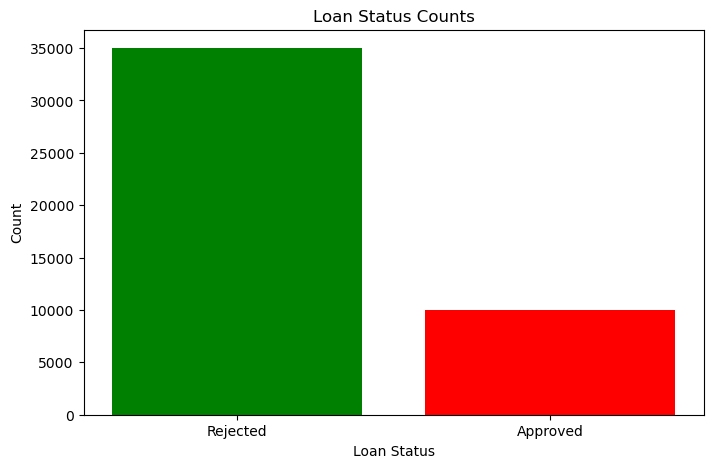

In [14]:
loan_status_counts = data['loan_status'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'])
plt.show()

#### Pie Chart of Home Ownership

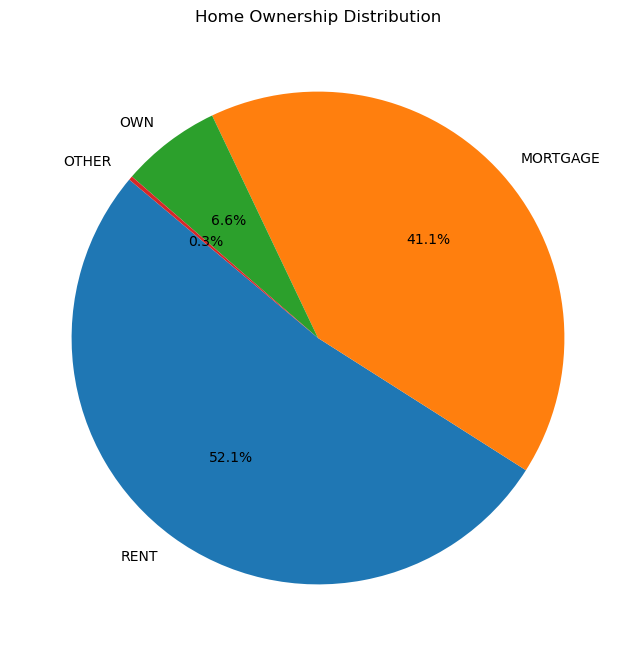

In [15]:
home_ownership_counts = data['person_home_ownership'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Home Ownership Distribution')
plt.show()

#### Scatter Plot of Credit Score vs. Loan Amount

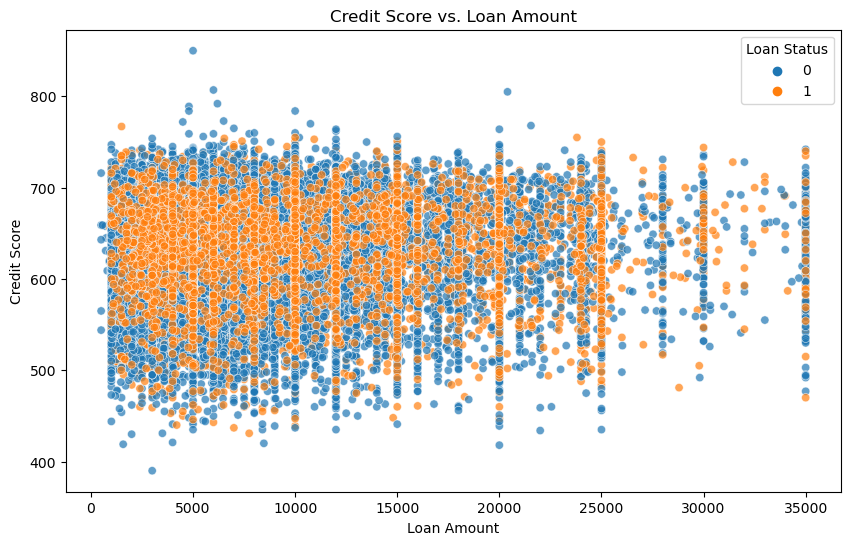

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='loan_amnt', y='credit_score', hue='loan_status', alpha=0.7)
plt.title('Credit Score vs. Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Credit Score')
plt.legend(title='Loan Status')
plt.show()

#### Violin Plot of Loan Amount by Loan Status

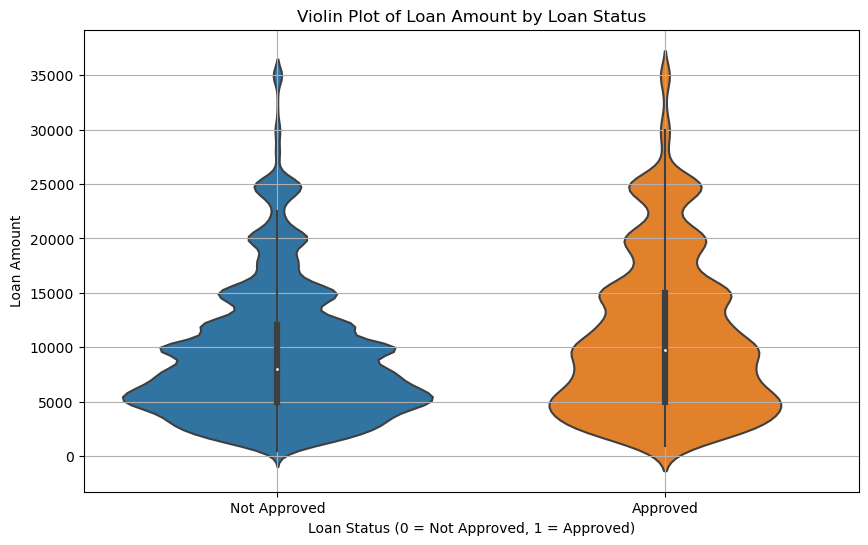

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status', y='loan_amnt', data=data_encoded)
plt.title('Violin Plot of Loan Amount by Loan Status')
plt.xlabel('Loan Status (0 = Not Approved, 1 = Approved)')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['Not Approved', 'Approved'])  # Labeling x-ticks
plt.grid(True)
plt.show()

#### Correlation Analysis

In [18]:
correlation_matrix = data_encoded.corr()

In [20]:
threshold = 0.5
high_correlations = correlation_matrix[(correlation_matrix.abs() >= threshold) & (correlation_matrix != 1)]

In [21]:
print("Correlations with an absolute value >= 0.5:")

Correlations with an absolute value >= 0.5:


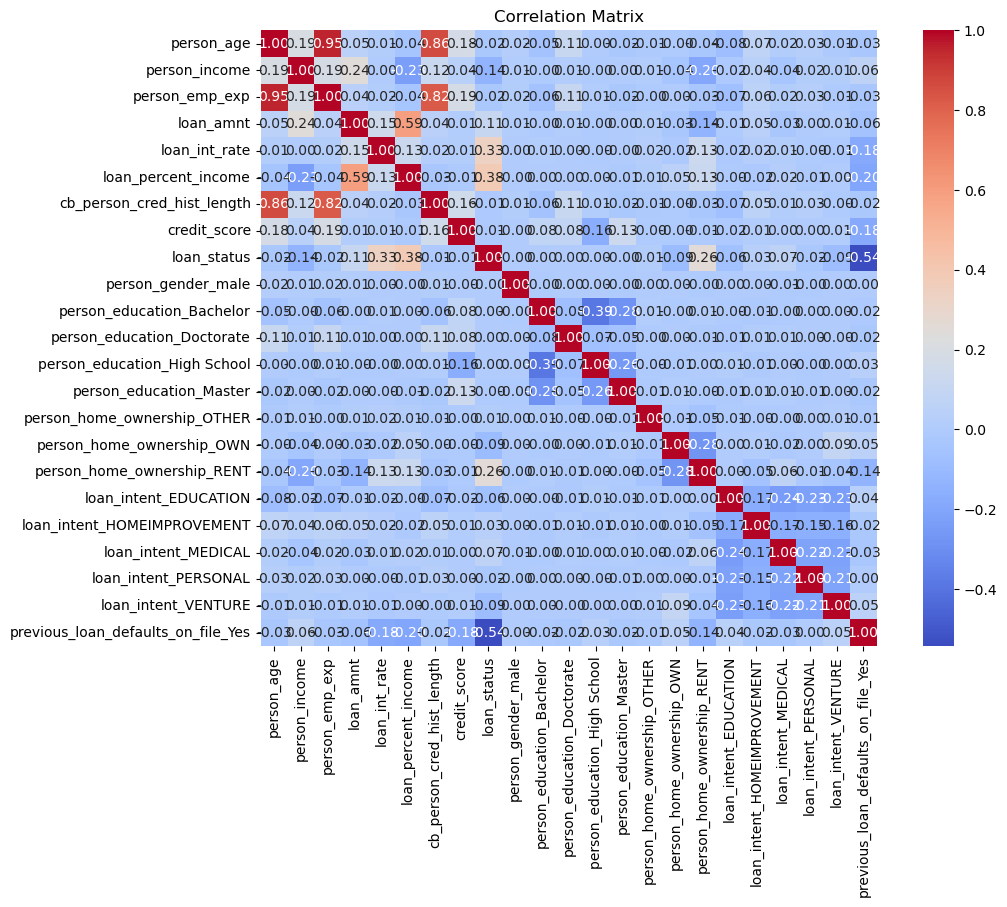

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### Random Forext Classifier

In [24]:
X = data_encoded.drop('loan_status', axis=1)  # Features
y = data_encoded['loan_status'] 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.93
Precision: 0.90
Recall: 0.77
F1 Score: 0.83


#### Confusion Matrix

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6819  171]
 [ 456 1554]]


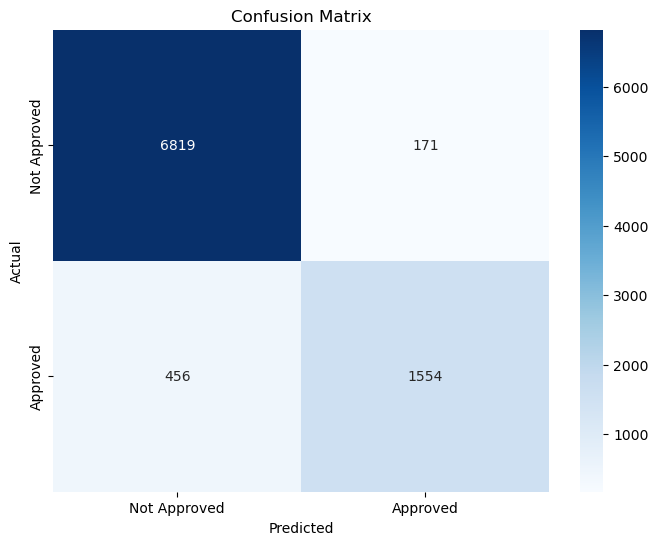

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()